<a href="https://colab.research.google.com/github/Chinmaya54/DM_Challenge_WC_Winner/blob/swayista/DM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

# Set the URL of the website to scrape
URL = "https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/index.html"

# Make a request to the website
response = requests.get(URL)

# Check if the request was successful

if response.status_code == 200:

    # Parse the HTML response using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the relevant data from the HTML response
    matches = soup.find_all('div', class_='match-info')

    # Create a list to store the scraped data
    data = []

    for match in matches:

        # Extract the match details
        match_date = match.find('span', class_='match-date').text
        match_teams = match.find_all('span', class_='team-name')
        team1 = match_teams[0].text
        team2 = match_teams[1].text

        # Add the match details to the list
        data.append({
            'match_date': match_date,
            'team1': team1,
            'team2': team2
        })

    # Save the scraped data to a file
    with open('cricket_world_cup_2023_data.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['match_date', 'team1', 'team2'])
        for row in data:
            writer.writerow(row.values())
else:
    print('Failed to scrape the website')

Failed to scrape the website


In [ ]:
import pandas as pd

In [ ]:
import csv

In [ ]:
import requests
from bs4 import BeautifulSoup

# Set the URL of the website to scrape
URL = "https://cricsheet.org/downloads/"

# Make a request to the website
response = requests.get(URL)

# Check if the request was successful

if response.status_code == 200:

    # Parse the HTML response using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the relevant data from the HTML response
    matches = soup.find_all('a', href=lambda x: x and x.endswith('.csv'))

    # Create a list to store the scraped data
    data = []

    for match in matches:

        # Extract the match date and match teams from the match URL
        match_url = match['href']
        match_date = match_url.split('/')[-2]
        match_teams = match_url.split('/')[-1].split('-')
        team1 = match_teams[0]
        team2 = match_teams[1]

        # Extract the match result from the match URL
        match_result = match_url.split('/')[-3]

        # Add the match details to the list
        data.append({
            'match_date': match_date,
            'team1': team1,
            'team2': team2,
            'match_result': match_result
        })

    # Save the scraped data to a file
    with open('cricket_world_cup_2023_data.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['match_date', 'team1', 'team2', 'match_result'])
        for row in data:
            writer.writerow(row.values())
else:
    print('Failed to scrape the website')

In [ ]:
import pandas as pd

# Read the scraped data from the CSV file
data = pd.read_csv('cricket_world_cup_2023_data.csv')

# Print the DataFrame
print(data)

Empty DataFrame
Columns: [match_date, team1, team2, match_result]
Index: []


In [ ]:
data.head()

,match_date,team1,team2,match_result


In [ ]:
# Create a DataFrame from the scraped data
    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df)

    # Save the DataFrame to a CSV file
    df.to_csv('cricket_world_cup_2023_data.csv', index=False)

IndentationError: ignored

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  # Import Pandas for DataFrame functionality

# Set the URL of the website to scrape
URL = "https://cricsheet.org/downloads/"

# Make a request to the website
response = requests.get(URL)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    matches = soup.find_all('a', href=lambda x: x and x.endswith('.csv'))

    # Create a list to store the scraped data
    data = []

    for match in matches:
        match_url = match['href']
        match_date = match_url.split('/')[-2]
        match_teams = match_url.split('/')[-1].split('-')
        team1 = match_teams[0]
        team2 = match_teams[1]
        match_result = match_url.split('/')[-3]

        # Append the match details to the list
        data.append({
            'match_date': match_date,
            'team1': team1,
            'team2': team2,
            'match_result': match_result
        })

    # Create a DataFrame from the scraped data
    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df)

    # Save the DataFrame to a CSV file
    df.to_csv('cricket_world_cup_2023_data.csv', index=False)
else:
    print('Failed to scrape the website')


Empty DataFrame
Columns: []
Index: []


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the data from "World_cup_2023.csv" into the 'World_cup' DataFrame
World_cup = pd.read_csv("/content/World_cup_2023.csv")

# Read the data from "results.csv" into the 'results' DataFrame
results = pd.read_csv("/content/results.csv")

fixtures = pd.read_csv("/content/Fixtures (2).csv")
Icc_ranking = pd.read_csv("/content/Icc_ranking (1).csv")

In [ ]:
World_cup.head()

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101


In [13]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


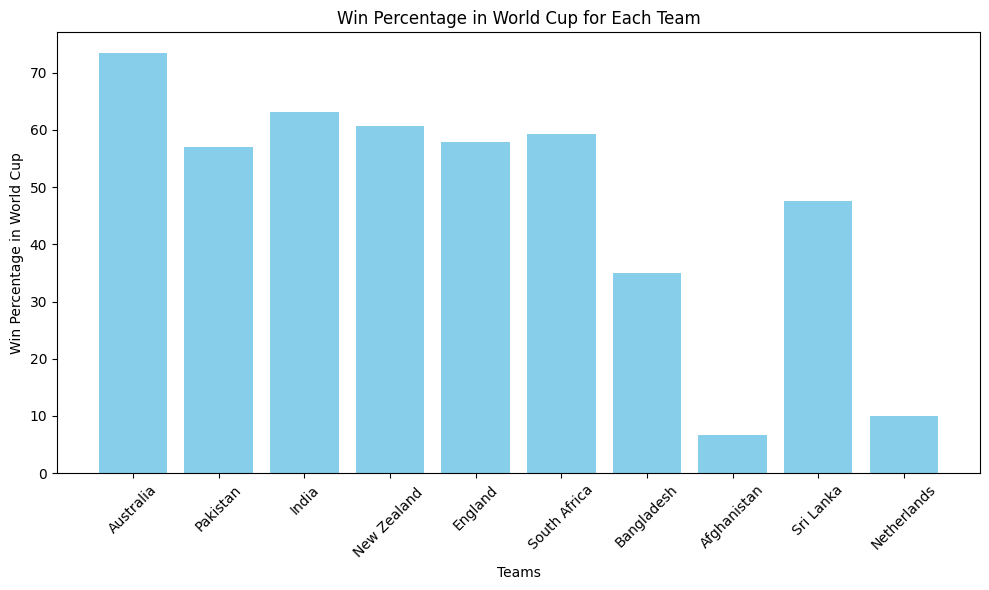

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



# Extracting data for the bar chart
teams = World_cup['Team_name']
win_percent_wc = World_cup['Win_percent_WC']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(teams, win_percent_wc, color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Win Percentage in World Cup')
plt.title('Win Percentage in World Cup for Each Team')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


In [1]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
match_df = pd.read_csv('/content/ODI_Match_info.csv')

In [6]:
match_wc_df = pd.read_csv('/content/matches(1).csv')

In [3]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,65634,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79,0,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,64817,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0,2,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,64816,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0,7,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,64815,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0,5,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


In [5]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2379 non-null   int64 
 1   season           2379 non-null   object
 2   city             2069 non-null   object
 3   date             2379 non-null   object
 4   team1            2379 non-null   object
 5   team2            2379 non-null   object
 6   toss_winner      2379 non-null   object
 7   toss_decision    2379 non-null   object
 8   result           2379 non-null   object
 9   dl_applied       2379 non-null   int64 
 10  winner           2259 non-null   object
 11  win_by_runs      2379 non-null   int64 
 12  win_by_wickets   2379 non-null   int64 
 13  player_of_match  2228 non-null   object
 14  venue            2379 non-null   object
 15  umpire1          2379 non-null   object
 16  umpire2          2379 non-null   object
 17  umpire3          2097 non-null   

**Null values are present**\
Need Imputation or dropping columns having a higher percentage of missing values.

In [7]:
# Checking null value percentage
percent_missing = match_df.isnull().sum() * 100 / len(match_df)
missing_value_df = pd.DataFrame({'missing_percentage': percent_missing, 'type': match_df.dtypes})
missing_value_df.sort_values('missing_percentage',ascending=False, inplace=True)
missing_value_df.head(20)

,missing_percentage,type
city,13.030685,object
umpire3,11.853720,object
player_of_match,6.347205,object
winner,5.044136,object
umpire2,0.000000,object
umpire1,0.000000,object
venue,0.000000,object
win_by_wickets,0.000000,int64
win_by_runs,0.000000,int64
id,0.000000,int64


In [8]:
match_df.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [10]:
match_df.dropna(subset=['winner'], inplace=True)

In [ ]:
#filling na values
match_df[["city", "player_of_match", "umpire3"]] = match_df[["city", "player_of_match", "umpire3"]].fillna(0)

In [11]:
match_df.isnull().sum()

id                   0
season               0
city               297
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match     57
venue                0
umpire1              0
umpire2              0
umpire3            267
dtype: int64

In [12]:
match_df.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [ ]:
match_df.drop(['city', 'result', 'player_of_match', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [13]:
# Changing date to proper date format
match_df['date'] = pd.to_datetime(match_df['date'])

In [14]:
match_df['team1'].unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'Afghanistan',
       'West Indies', 'Scotland', 'United Arab Emirates', 'Oman',
       'Netherlands', 'Zimbabwe', 'United States of America', 'Ireland',
       'Canada', 'Namibia', 'Jersey', 'Papua New Guinea', 'Hong Kong',
       'Kenya', 'Africa XI', 'Bermuda'], dtype=object)

In [15]:

# List of semifinalist teams
semifinalist_teams = ['India', 'South Africa', 'Australia', 'New Zealand']

# Extract rows where 'team1' or 'team2' is a semifinalist
semifinalist_matches_df = match_df[match_df['team1'].isin(semifinalist_teams) | match_df['team2'].isin(semifinalist_teams)]

# Display the new DataFrame
semifinalist_matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
6,1373575,2023/24,Johannesburg,2023-09-17,South Africa,Australia,Australia,field,normal,0,South Africa,122,0,M Jansen,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon


In [70]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the total matches played by each team (team1 and team2)
matches_by_team1 = semifinalist_matches_df['team1'].value_counts()
matches_by_team2 = semifinalist_matches_df['team2'].value_counts()

# Merge the total matches played by each team into a single Series
total_matches_series = matches_by_team1.add(matches_by_team2, fill_value=0)

# Calculate the matches won by each team (team1 and team2)
team1_wins = semifinalist_matches_df[semifinalist_matches_df['team1'] == semifinalist_matches_df['winner']]['team1'].value_counts()
team2_wins = semifinalist_matches_df[semifinalist_matches_df['team2'] == semifinalist_matches_df['winner']]['team2'].value_counts()

# Merge the wins by each team into a single Series
total_wins_series = team1_wins.add(team2_wins, fill_value=0)

# Calculate the winning percentage for each team
winning_percentage = (total_wins_series / total_matches_series) * 100

# Round the winning percentage to two decimal points
winning_percentage = winning_percentage.round(2)


# Add the winning percentage as a new column to the DataFrame
semifinalist_matches_df['winning_percentage'] = semifinalist_matches_df['winner'].map(winning_percentage)

# Display the updated DataFrame
print(semifinalist_matches_df)


           id   season          city       date         team1        team2  \
0     1389389  2023/24        Indore 2023-09-24         India    Australia   
2     1395701     2023         Dhaka 2023-09-23   New Zealand   Bangladesh   
3     1389388  2023/24    Chandigarh 2023-09-22     Australia        India   
5     1388414     2023       Colombo 2023-09-17     Sri Lanka        India   
6     1373575  2023/24  Johannesburg 2023-09-17  South Africa    Australia   
...       ...      ...           ...        ...           ...          ...   
2374    65634  2002/03        Sydney 2003-01-09     Sri Lanka    Australia   
2375    64817  2002/03    Wellington 2003-01-08   New Zealand        India   
2376    64816  2002/03    Queenstown 2003-01-04         India  New Zealand   
2377    64815  2002/03  Christchurch 2003-01-01         India  New Zealand   
2378    64814  2002/03        Napier 2002-12-29   New Zealand        India   

      toss_winner toss_decision  result  dl_applied  ...  \
0  

<ipython-input-70-9e8989d597e2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['winning_percentage'] = semifinalist_matches_df['winner'].map(winning_percentage)


In [30]:
#import pandas as pd

# Assuming 'df' is your DataFrame

# Remove rows where 'winner' column contains NaN
#df = semifinalist_matches_df.dropna(subset=['winner'])

# Show the updated DataFrame
#print(df)

           id   season          city       date         team1        team2  \
0     1389389  2023/24        Indore 2023-09-24         India    Australia   
2     1395701     2023         Dhaka 2023-09-23   New Zealand   Bangladesh   
3     1389388  2023/24    Chandigarh 2023-09-22     Australia        India   
5     1388414     2023       Colombo 2023-09-17     Sri Lanka        India   
6     1373575  2023/24  Johannesburg 2023-09-17  South Africa    Australia   
...       ...      ...           ...        ...           ...          ...   
2374    65634  2002/03        Sydney 2003-01-09     Sri Lanka    Australia   
2375    64817  2002/03    Wellington 2003-01-08   New Zealand        India   
2376    64816  2002/03    Queenstown 2003-01-04         India  New Zealand   
2377    64815  2002/03  Christchurch 2003-01-01         India  New Zealand   
2378    64814  2002/03        Napier 2002-12-29   New Zealand        India   

      toss_winner toss_decision  result  dl_applied  ... win_by

In [31]:
#df.shape

(1262, 22)

In [71]:
semifinalist_matches_df.shape

(1262, 24)

In [72]:
semifinalist_matches_df['team1'].unique()

array(['India', 'New Zealand', 'Australia', 'Sri Lanka', 'South Africa',
       'Bangladesh', 'England', 'Nepal', 'West Indies', 'Pakistan',
       'Netherlands', 'Zimbabwe', 'Scotland', 'Ireland', 'Afghanistan',
       'Canada', 'Kenya', 'Hong Kong', 'Bermuda',
       'United States of America'], dtype=object)

In [73]:
semifinalist_matches_df['team2'].unique()

array(['Australia', 'Bangladesh', 'India', 'New Zealand', 'Sri Lanka',
       'Pakistan', 'South Africa', 'West Indies', 'Netherlands',
       'England', 'Zimbabwe', 'Ireland', 'Hong Kong', 'Scotland',
       'United Arab Emirates', 'Afghanistan', 'Canada', 'Kenya',
       'ICC World XI', 'United States of America', 'Namibia'],
      dtype=object)

In [74]:
# List of all unique teams
all_teams = ['India', 'New Zealand', 'Australia', 'Sri Lanka', 'South Africa', 'Bangladesh', 'England', 'Nepal',
             'West Indies', 'Pakistan', 'Netherlands', 'Zimbabwe', 'Scotland', 'Ireland', 'Afghanistan', 'Canada',
             'Kenya', 'Hong Kong', 'Bermuda', 'United States of America', 'United Arab Emirates', 'ICC World XI',
             'Namibia']

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(all_teams)

# Encode 'team1' and 'team2' columns in the DataFrame
semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
semifinalist_matches_df['toss_winner_encoded'] = label_encoder.transform(semifinalist_matches_df['toss_winner'])
semifinalist_matches_df['winner_encoded'] = label_encoder.transform(semifinalist_matches_df['winner'])
# Display the updated DataFrame
semifinalist_matches_df.head()

<ipython-input-74-b106e2651fd8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
<ipython-input-74-b106e2651fd8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
<ipython-input-74-b106e2651fd8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,venue,umpire1,umpire2,umpire3,team1_encoded,team2_encoded,toss_winner_encoded,winner_encoded,venue_encoded,winning_percentage
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,...,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan,8,1,1,8,70,62.77
2,1395701,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,0,...,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon,14,2,14,14,172,55.76
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,...,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal,1,8,8,8,132,62.77
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,...,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney,18,8,18,8,142,62.77
6,1373575,2023/24,Johannesburg,2023-09-17,South Africa,Australia,Australia,field,normal,0,...,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon,17,1,1,17,189,62.72


In [75]:
# Assuming 'df' is your DataFrame

# Group by team and find the top two teams with the highest winning percentage
top_teams = semifinalist_matches_df.groupby('winner').max().nlargest(2, 'winning_percentage')[['winning_percentage']]

print("Top 2 Teams with Highest Winning Percentage:")
print(top_teams)


Top 2 Teams with Highest Winning Percentage:
           winning_percentage
winner                       
Australia               65.79
India                   62.77


<ipython-input-75-fddc9db822a8>:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_teams = semifinalist_matches_df.groupby('winner').max().nlargest(2, 'winning_percentage')[['winning_percentage']]


In [76]:
# Assuming 'df' is your DataFrame

# List of four teams to consider
teams_to_consider = ['South Africa', 'Australia', 'India', 'New Zealand']

# Filter rows where the winner is one of the specified teams
filtered_df =semifinalist_matches_df [semifinalist_matches_df['winner'].isin(teams_to_consider)]

# Group by team and find the top two teams with the highest winning percentage
top_teams = filtered_df.groupby('winner').max().nlargest(2, 'winning_percentage')[['winning_percentage']]

print("Top 2 Teams with Highest Winning Percentage:")
print(top_teams)


Top 2 Teams with Highest Winning Percentage:
           winning_percentage
winner                       
Australia               65.79
India                   62.77


<ipython-input-76-86a1d0bd2fa0>:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_teams = filtered_df.groupby('winner').max().nlargest(2, 'winning_percentage')[['winning_percentage']]


In [77]:
semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])

<ipython-input-77-b86f119e5c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['venue_encoded'] = label_encoder.fit_transform(semifinalist_matches_df['venue'])


In [78]:
semifinalist_matches_df.dtypes

id                              int64
season                         object
city                           object
date                   datetime64[ns]
team1                          object
team2                          object
toss_winner                    object
toss_decision                  object
result                         object
dl_applied                      int64
winner                         object
win_by_runs                     int64
win_by_wickets                  int64
player_of_match                object
venue                          object
umpire1                        object
umpire2                        object
umpire3                        object
team1_encoded                   int64
team2_encoded                   int64
toss_winner_encoded             int64
winner_encoded                  int64
venue_encoded                   int64
winning_percentage            float64
dtype: object

<ipython-input-79-baa919a668d0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = semifinalist_matches_df.corr()


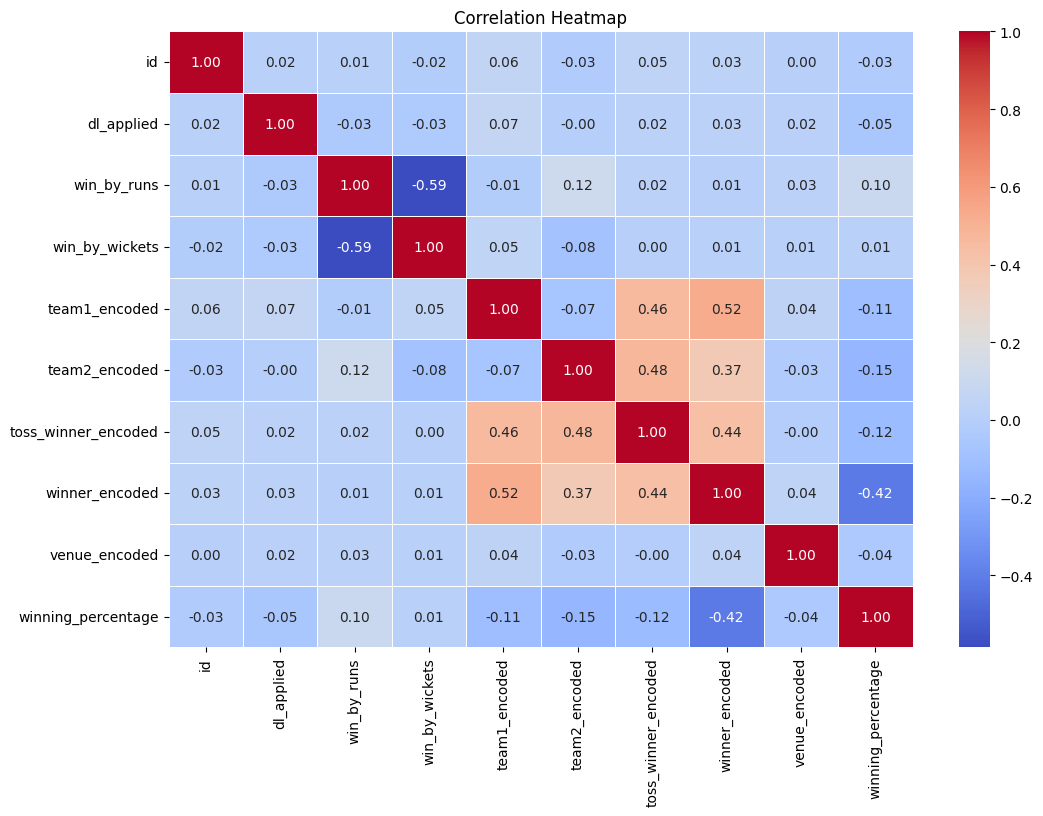

In [79]:


# Feature Selection using Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = semifinalist_matches_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




In [32]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping




In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
from sklearn.linear_model import LogisticRegression

In [30]:
teams_to_predict = ['New Zealand', 'South Africa', 'India', 'Australia']
team_data = semifinalist_matches_df[semifinalist_matches_df['team1'].isin(teams_to_predict) & semifinalist_matches_df['team2'].isin(teams_to_predict)]

In [50]:
features = ['win_by_runs', 'win_by_wickets', 'toss_winner_encoded', 'winner_encoded']
X = team_data[features]
y = team_data['winning_percentage']


In [51]:
# Train-test split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [36]:
print('X_train dimension= ', X_train.shape)
print('X_val dimension= ', X_val.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_val dimension= ', y_val.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (200, 4)
X_val dimension=  (43, 4)
X_test dimension=  (43, 4)
y_train dimension=  (200,)
y_val dimension=  (43,)
y_test dimension=  (43,)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Teams to encode as 1, 2, 3, 4, others as 0
teams_to_encode = {'South Africa': 1, 'Australia': 2, 'India': 3, 'New Zealand': 4}

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the LabelEncoder on all unique teams
label_encoder.fit(all_teams)

# Encode 'team1' and 'team2' columns in the DataFrame
semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
semifinalist_matches_df['toss_winner_encoded'] = label_encoder.transform(semifinalist_matches_df['toss_winner'])

# Map and encode 'winner' column based on the specified teams_to_encode
semifinalist_matches_df['winner_encoded'] = semifinalist_matches_df['winner'].map(teams_to_encode).fillna(0).astype(int)

# Display the updated DataFrame
print(semifinalist_matches_df.head())

        id   season          city       date         team1       team2  \
0  1389389  2023/24        Indore 2023-09-24         India   Australia   
2  1395701     2023         Dhaka 2023-09-23   New Zealand  Bangladesh   
3  1389388  2023/24    Chandigarh 2023-09-22     Australia       India   
5  1388414     2023       Colombo 2023-09-17     Sri Lanka       India   
6  1373575  2023/24  Johannesburg 2023-09-17  South Africa   Australia   

   toss_winner toss_decision  result  dl_applied  ...  \
0    Australia         field     D/L           1  ...   
2  New Zealand           bat  normal           0  ...   
3        India         field  normal           0  ...   
5    Sri Lanka           bat  normal           0  ...   
6    Australia         field  normal           0  ...   

                                               venue                umpire1  \
0                     Holkar Cricket Stadium, Indore          J Madanagopal   
2              Shere Bangla National Stadium, Mirpur  

<ipython-input-80-92d9d6ece471>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team1_encoded'] = label_encoder.transform(semifinalist_matches_df['team1'])
<ipython-input-80-92d9d6ece471>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinalist_matches_df['team2_encoded'] = label_encoder.transform(semifinalist_matches_df['team2'])
<ipython-input-80-92d9d6ece471>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:


# Train-test split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)


print('X_train dimension= ', X_train.shape)
print('X_val dimension= ', X_val.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_val dimension= ', y_val.shape)
print('y_test dimension= ', y_test.shape)



In [ ]:


# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



In [86]:
# Assuming semifinalist_matches_df is your DataFrame

# Define features (X) and target variable (y)
X = semifinalist_matches_df[['win_by_runs', 'win_by_wickets', 'toss_winner_encoded', 'winning_percentage']]
y = semifinalist_matches_df['winner_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
#predicted_probabilities = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Combine predictions with the original DataFrame
#test_results = X_test.copy()
#test_results['winner_encoded'] = y_test  # Add the 'winner_encoded' column to the test_results DataFrame
#test_results['predicted_probability'] = predicted_probabilities

# Reverse the encoding to get team names
#label_mapping_reverse = {v: k for k, v in label_encoder.classes_.items()}
#test_results['winner_name'] = test_results['winner_encoded'].map(label_mapping_reverse)


# Extract top 2 teams with the highest predicted probabilities
#top_teams = test_results.groupby('winner_encoded').max().nlargest(2, 'predicted_probability')[['predicted_probability']]
#print(top_teams)


LogisticRegression(max_iter=1000)

In [85]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.91
